In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit as fit

In [2]:
df = pd.read_csv('Magnet Calibration.csv', delimiter=';')
df.head()

,I,B1,B2
0,0,10.0,10.0
1,1,40.2,36.6
2,2,70.5,67.0
3,3,101.6,98.5
4,4,132.4,130.0


In [9]:
def linear(x, a, b):
    return a * x + b

In [11]:
a1, b1 = fit(linear, df['I'].values, df['B1'].values)[0]
a1

30.613529411829298

In [17]:
a2, b2 = fit(linear, -df['I'].values, df['B2'].values)[0]
a2

-30.183382349710467

In [ ]:
#Ток Амперы, Поле в мТл
#Первое поле правое плюс левое минус

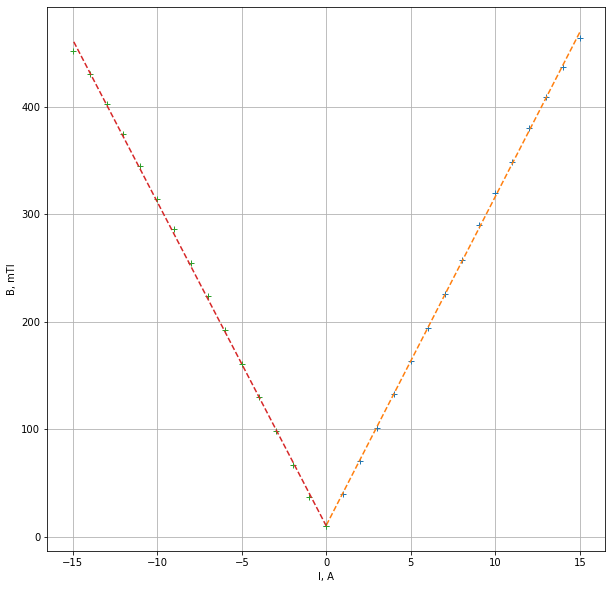

In [23]:
plt.figure(figsize=(10, 10))
plt.plot(df['I'].values, df['B1'].values, '+')
plt.plot(df['I'].values, a1 * df['I'].values + b1, '--')
plt.plot(-df['I'].values, df['B2'].values, '+')
plt.plot(-df['I'].values, -a2 * df['I'].values + b2, '--')
plt.ylabel('B, mTl')
plt.xlabel('I, A')
plt.grid()
plt.show()